In [61]:
import pandas as pd 

In [66]:
!unzip /content/drive/MyDrive/DMT/ml-1m.zip

Archive:  /content/drive/MyDrive/DMT/ml-1m.zip
replace ml-1m/movies.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [107]:
#making a dataframe
uname = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/content/ml-1m/users.dat', sep = '::', header = None, names = uname, engine = 'python')

rname = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/content/ml-1m/ratings.dat', sep = '::', header = None, names = rname, engine = 'python')

mname = ['user_id', 'title', 'genres']
movies = pd.read_table('/content/ml-1m/movies.dat', sep = '::', header = None, names = mname, engine = 'python')

In [108]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [109]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [110]:
movies

,user_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [111]:
#merging all the dataframes
data = pd.merge(pd.merge(ratings, users), movies)

In [112]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller


In [113]:
df = pd.DataFrame(data)
df

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller


In [114]:
#q1
# Making the genres column into a list for simpler
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"


In [115]:
data_1 = data[["rating","title","genres"]]

In [116]:
#counting the number of times the genre occurs in the dataframe using dict_counter and the sum of the ratings for each genre
dict_counter = {}
dict_rating = {}
def count_me(x):
  for gnr in x['genres']:
    if gnr not in dict_counter:
      dict_counter[gnr] = 1
      dict_rating[gnr] = x['rating']
    else:
      dict_counter[gnr] += 1
      dict_rating[gnr] += x['rating']

In [117]:
data_1

,rating,title,genres
0,5,Toy Story (1995),"[Animation, Children's, Comedy]"
1,3,Toy Story (1995),"[Animation, Children's, Comedy]"
2,3,Toy Story (1995),"[Animation, Children's, Comedy]"
3,4,Toy Story (1995),"[Animation, Children's, Comedy]"
4,5,Toy Story (1995),"[Animation, Children's, Comedy]"
...,...,...,...
645828,3,"Contender, The (2000)","[Drama, Thriller]"
645829,3,"Contender, The (2000)","[Drama, Thriller]"
645830,5,"Contender, The (2000)","[Drama, Thriller]"
645831,4,"Contender, The (2000)","[Drama, Thriller]"


In [118]:
#applying the count_me function for every row of the dataframe data_1
data_1.apply(lambda x: count_me(x),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
645828    None
645829    None
645830    None
645831    None
645832    None
Length: 645833, dtype: object

In [119]:
dict_counter

{'Action': 81499,
 'Adventure': 48523,
 'Animation': 19604,
 "Children's": 43203,
 'Comedy': 189137,
 'Crime': 36471,
 'Documentary': 21791,
 'Drama': 267505,
 'Fantasy': 10576,
 'Film-Noir': 9608,
 'Horror': 55342,
 'Musical': 22099,
 'Mystery': 16016,
 'Romance': 85473,
 'Sci-Fi': 48351,
 'Thriller': 76476,
 'War': 25221,
 'Western': 11081}

In [120]:
dict_rating

{'Action': 288034,
 'Adventure': 173253,
 'Animation': 69948,
 "Children's": 153572,
 'Comedy': 673979,
 'Crime': 130733,
 'Documentary': 78363,
 'Drama': 959003,
 'Fantasy': 37000,
 'Film-Noir': 34143,
 'Horror': 197610,
 'Musical': 77921,
 'Mystery': 57926,
 'Romance': 301330,
 'Sci-Fi': 173417,
 'Thriller': 276971,
 'War': 88765,
 'Western': 40198}

In [122]:
#calculating the average of the each genre
avg = []
for i in dict_rating:
  print(i, ":", dict_rating[i]/ dict_counter[i])

Animation : 3.5680473372781063
Children's : 3.554660555979909
Comedy : 3.563443429894732
Adventure : 3.5705335614038702
Fantasy : 3.4984871406959153
Romance : 3.525440782469318
Drama : 3.584990934748883
Action : 3.5342028736548916
Crime : 3.5845740451317485
Thriller : 3.6216721585857
Horror : 3.5707057930685555
Sci-Fi : 3.5866269570432876
Documentary : 3.5961176632554723
War : 3.5194877284802346
Musical : 3.5259966514321914
Mystery : 3.616758241758242
Film-Noir : 3.553601165695254
Western : 3.6276509340312244


In [123]:
#q2
#Get only women ratings
df1 = df.loc[df['gender'] == 'F']
df1

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),"[Animation, Children's, Comedy]"
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)","[Drama, Thriller]"


In [124]:
#counting the number of times the genre occurs in the dataframe using dict_counter and the sum of the ratings for each genre
dict_counter = {}
dict_rating = {}
def count_me(x):
  for gnr in x['genres']:
    if gnr not in dict_counter:
      dict_counter[gnr] = 1
      dict_rating[gnr] = x['rating']
    else:
      dict_counter[gnr] += 1
      dict_rating[gnr] += x['rating']

In [125]:
#applying the count_me function for every row of the dataframe df_1
df1.apply(lambda x: count_me(x),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
645828    None
645829    None
645830    None
645831    None
645832    None
Length: 154536, dtype: object

In [126]:
x = dict_counter

In [127]:
#sorting the values in the dictionary in ascending order 
a = sorted(x.items(), key=lambda item: item[1])
a

[('Western', 1887),
 ('Fantasy', 2148),
 ('Film-Noir', 2536),
 ('Mystery', 3428),
 ('Documentary', 4590),
 ('Animation', 6025),
 ('Musical', 6341),
 ('Crime', 6884),
 ('War', 7962),
 ('Sci-Fi', 11294),
 ('Horror', 11461),
 ('Adventure', 12133),
 ("Children's", 12212),
 ('Thriller', 16000),
 ('Romance', 17735),
 ('Action', 19413),
 ('Comedy', 49141),
 ('Drama', 66364)]

In [128]:
#taking only the top 5 genres, (from the bottom - with max number of rating)
a = a[-5:]

In [129]:
#print it in descending order
a.reverse()
a

[('Drama', 66364),
 ('Comedy', 49141),
 ('Action', 19413),
 ('Romance', 17735),
 ('Thriller', 16000)]

In [130]:
#printing only the genres
i=0
for i in a:
  print(i[0])

Drama
Comedy
Action
Romance
Thriller


In [131]:
#q3
#Get only men ratings
df3 = df.loc[df['gender'] == 'M']
df3

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
53,2,1357,5,978298709,M,56,16,70072,Jumanji (1995),"[Adventure, Children's, Fantasy]"
54,2,3068,4,978299000,M,56,16,70072,Jumanji (1995),"[Adventure, Children's, Fantasy]"
55,2,1537,4,978299620,M,56,16,70072,Jumanji (1995),"[Adventure, Children's, Fantasy]"
56,2,647,3,978299351,M,56,16,70072,Jumanji (1995),"[Adventure, Children's, Fantasy]"
57,2,2194,4,978299297,M,56,16,70072,Jumanji (1995),"[Adventure, Children's, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...
645574,3950,1210,4,965680658,M,25,4,60056,Tigerland (2000),[Drama]
645575,3950,543,2,965681352,M,25,4,60056,Tigerland (2000),[Drama]
645576,3950,551,4,965681476,M,25,4,60056,Tigerland (2000),[Drama]
645577,3950,552,3,965681502,M,25,4,60056,Tigerland (2000),[Drama]


In [93]:
#counting the number of times the genre occurs in the dataframe using dict_counter and the sum of the ratings for each genre
dict_counter1 = {}
dict_rating1 = {}
def count_me1(x):
  for gnr in x['genres']:
    if gnr not in dict_counter1:
      dict_counter1[gnr] = 1
      dict_rating1[gnr] = x['rating']
    else:
      dict_counter1[gnr] += 1
      dict_rating1[gnr] += x['rating']

In [94]:
#applying the count_me function for every row of the dataframe df_1
df3.apply(lambda x: count_me1(x),axis=1)

53        None
54        None
55        None
56        None
57        None
          ... 
645574    None
645575    None
645576    None
645577    None
645578    None
Length: 491297, dtype: object

In [95]:
x1 = dict_counter1

In [96]:
#sorting the values in the dictionary in ascending order 
b = sorted(x1.items(), key=lambda item1: item1[1])
b

[('Film-Noir', 7072),
 ('Fantasy', 8428),
 ('Western', 9194),
 ('Mystery', 12588),
 ('Animation', 13579),
 ('Musical', 15758),
 ('Documentary', 17201),
 ('War', 17259),
 ('Crime', 29587),
 ("Children's", 30991),
 ('Adventure', 36390),
 ('Sci-Fi', 37057),
 ('Horror', 43881),
 ('Thriller', 60476),
 ('Action', 62086),
 ('Romance', 67738),
 ('Comedy', 139996),
 ('Drama', 201141)]

In [97]:
#taking only the top 5 genres, (from the bottom - with max number of rating)
b = b[-5:]

In [98]:
#print it in descending order
b.reverse()
b

[('Drama', 201141),
 ('Comedy', 139996),
 ('Romance', 67738),
 ('Action', 62086),
 ('Thriller', 60476)]

In [99]:
#printing only the genres
i = 0 
for i in b:
  print(i[0])

Drama
Comedy
Romance
Action
Thriller


In [100]:
#q4(a)
timeperiod = pd.merge(pd.merge(ratings, users), movies)
timeperiod                

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller


In [101]:
#data['genres']
#picking the genres Drama from the dataframe timeperiod
timeperiod[timeperiod['genres'].str.contains('Drama')]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
233,4,3468,5,978294008,M,45,7,02460,Waiting to Exhale (1995),Comedy|Drama
234,4,1210,3,978293924,M,45,7,02460,Waiting to Exhale (1995),Comedy|Drama
235,4,2951,4,978294282,M,45,7,02460,Waiting to Exhale (1995),Comedy|Drama
236,4,1214,4,978294260,M,45,7,02460,Waiting to Exhale (1995),Comedy|Drama
237,4,1036,4,978294282,M,45,7,02460,Waiting to Exhale (1995),Comedy|Drama
...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller


In [102]:
#making another columnn year filtering out the timeperiod from which we need the average rating of the Drama genre

timeperiod['year'] = timeperiod['title'].apply(lambda x: x[-5:-1])
timeperiod['year'] = timeperiod['year'].astype('int')
timeperiod

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
...,...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000


In [103]:
#selecting the time period between 1970 and 1979
df4 = timeperiod.loc[(1970 <= timeperiod['year']) & (timeperiod['year'] <= 1979)]

In [104]:
df4

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
13758,111,2997,4,977512193,M,35,15,55416,Taxi Driver (1976),Drama|Thriller,1976
13759,111,1188,4,977512079,M,35,15,55416,Taxi Driver (1976),Drama|Thriller,1976
13760,111,1265,4,977512124,M,35,15,55416,Taxi Driver (1976),Drama|Thriller,1976
13761,111,590,5,977512331,M,35,15,55416,Taxi Driver (1976),Drama|Thriller,1976
13762,111,593,4,977511859,M,35,15,55416,Taxi Driver (1976),Drama|Thriller,1976
...,...,...,...,...,...,...,...,...,...,...,...
645328,3947,1219,5,965691500,M,25,0,90019,Get Carter (1971),Thriller,1971
645329,3947,1073,5,965691824,M,25,0,90019,Get Carter (1971),Thriller,1971
645330,3947,1097,4,965691824,M,25,0,90019,Get Carter (1971),Thriller,1971
645331,3947,1240,4,965688288,M,25,0,90019,Get Carter (1971),Thriller,1971


In [105]:
#taking the average value 
df4['rating'].mean(axis = 0, skipna = True)   

3.6266763495521666

In [106]:
#q 4(b)
df5 = timeperiod.loc[(1980 <= timeperiod['year']) & (timeperiod['year'] <= 1989)]
df5

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
18242,142,3793,4,977350627,M,25,7,10011,Shadows (Cienie) (1988),Drama,1988
18243,142,2997,5,977352427,M,25,7,10011,Shadows (Cienie) (1988),Drama,1988
18244,142,589,3,977352186,M,25,7,10011,Shadows (Cienie) (1988),Drama,1988
18245,142,1,4,977352868,M,25,7,10011,Shadows (Cienie) (1988),Drama,1988
18246,142,3007,2,977352544,M,25,7,10011,Shadows (Cienie) (1988),Drama,1988
...,...,...,...,...,...,...,...,...,...,...,...
643710,3941,70,3,965692869,M,45,17,40031,Sorority House Massacre (1986),Horror,1986
643711,3941,1210,2,965692498,M,45,17,40031,Sorority House Massacre (1986),Horror,1986
643712,3941,3754,1,965692608,M,45,17,40031,Sorority House Massacre (1986),Horror,1986
643713,3941,2028,4,965692465,M,45,17,40031,Sorority House Massacre (1986),Horror,1986


In [43]:
df5['rating'].mean(axis = 0, skipna = True)  

3.5896338609378433

In [44]:
#q 4(c)
df6 = timeperiod.loc[(1990 <= timeperiod['year']) & (timeperiod['year'] <= 1999)]
df6

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
...,...,...,...,...,...,...,...,...,...,...,...
644316,3942,2985,2,965692085,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644317,3942,1246,4,966547964,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644318,3942,2986,1,966548652,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644319,3942,1247,3,966547261,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990


In [45]:
df6['rating'].mean(axis = 0, skipna = True)

3.585075484171625

In [46]:
#q 4(d) 
df7 = timeperiod.loc[(1990 <= timeperiod['year']) & (timeperiod['year'] <= 1999)]
df7

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
1,1,661,3,978302109,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
2,1,914,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
3,1,3408,4,978300275,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
4,1,2355,5,978824291,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995
...,...,...,...,...,...,...,...,...,...,...,...
644316,3942,2985,2,965692085,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644317,3942,1246,4,966547964,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644318,3942,2986,1,966548652,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990
644319,3942,1247,3,966547261,M,18,4,49855,Sorority House Massacre II (1990),Horror,1990


In [47]:
df7['rating'].mean(axis = 0, skipna = True)

3.585075484171625

In [48]:
#q 4(d) 
df8 = timeperiod.loc[(2000 <= timeperiod['year']) & (timeperiod['year'] <= 2009)]
df8

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
506711,3190,3793,4,968651229,M,1,17,97062,Supernova (2000),Adventure|Sci-Fi,2000
506712,3190,1257,5,968651088,M,1,17,97062,Supernova (2000),Adventure|Sci-Fi,2000
506713,3190,1,3,968650558,M,1,17,97062,Supernova (2000),Adventure|Sci-Fi,2000
506714,3190,1407,4,968651333,M,1,17,97062,Supernova (2000),Adventure|Sci-Fi,2000
506715,3190,1270,4,968651187,M,1,17,97062,Supernova (2000),Adventure|Sci-Fi,2000
...,...,...,...,...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645829,3952,2032,3,974595637,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645830,3952,1230,5,965676609,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000
645831,3952,2971,4,974594814,F,45,1,12449,"Contender, The (2000)",Drama|Thriller,2000


In [49]:
df8['rating'].mean(axis = 0, skipna = True)

3.544026319680615

In [50]:
#q5
#function ranking takes a genre and ranking range and returns sorted average rating for the particular movie withing the ranking range
def ranking(genre, ranking_range):
  p1 = timeperiod[timeperiod['genres'].str.contains(genre)]
  mean_ratings = p1.pivot_table('rating', index='title', aggfunc='mean')
  p2 = mean_ratings.loc[(ranking_range[0] <= mean_ratings['rating']) & (mean_ratings['rating'] <= ranking_range[1])]
  final = p2.sort_values(by='rating')
  return final

In [51]:
#example with Drama as genre and [3.5, 4] ranking range
ranking('Drama', [3.5, 4])

,rating
title,
Patch Adams (1998),3.5
Tess of the Storm Country (1922),3.5
Kundun (1997),3.5
Paths of Glory (1957),3.5
"Alley Cats, The (1968)",3.5
...,...
Plenty (1985),4.0
"Lost Son, The (1999)",4.0
Panther (1995),4.0


In [54]:
#q6 
import matplotlib.pyplot as plt 
st = sorted(x1.items(), key=lambda item1: item1[1])
st

[('Film-Noir', 7072),
 ('Fantasy', 8428),
 ('Western', 9194),
 ('Mystery', 12588),
 ('Animation', 13579),
 ('Musical', 15758),
 ('Documentary', 17201),
 ('War', 17259),
 ('Crime', 29587),
 ("Children's", 30991),
 ('Adventure', 36390),
 ('Sci-Fi', 37057),
 ('Horror', 43881),
 ('Thriller', 60476),
 ('Action', 62086),
 ('Romance', 67738),
 ('Comedy', 139996),
 ('Drama', 201141)]

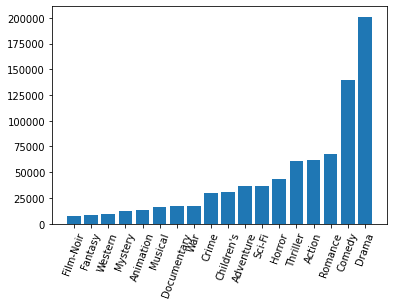

In [132]:
#bar graph for the sorted top 5 ranked genres by men on most number of rating
plt.bar(range(len(st)),[val[1] for val in st])
plt.xticks(range(len(st)), [val[0] for val in st])
plt.xticks(rotation=70)
plt.show()

In [ ]:
#q6
#Men like drama more than adventure, sci-fi or action which is something interesting we find from 
#plotting the data which is against the social norm of men liking these types of genres more.